# TIME SERIES ANALYSIS - LFP

In [1]:
import xarray
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import periodogram
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading data from only one session of a mouse
dset = xarray.load_dataset(filename_or_obj='/home/sangeetha/Work/Germany/bootcamp/data/steinmetz_neuromatch_dataset/steinmetz_2016-12-14_Cori.nc')
dset

<xarray.Dataset>
Dimensions:             (trial: 364, time: 250, cell: 734,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 7, spike_id: 2446173)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 359 360 361 362 363 364
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 729 730 731 732 733 734
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'LS' ... 'SUB' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2446171 2446172 2446173
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 100 0 50 0 0 ... 0 100 50 50 0 25 100
    contrast_right      (trial) int8 0 50 50 0 100 0 0 ... 25 100 25 25 50 0 100
    gocue               (trial) float64 1.027 0.8744 0.8252 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.187 1.438 0.986 2.296 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -2.851 ... 5.571
    spike_time          (spike_id) float32 0.2676 2.308 0.8535 ... 2.189 2.399
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 734 734 734 734 734
    spike_trial         (spike_id) uint32 21 21 31 37 43 ... 364 364 364 364 364
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

In [3]:
# extracting only the lfp data to simplify analysis
lfp_dset = dset.lfp
lfp_dset

<xarray.DataArray 'lfp' (brain_area_lfp: 7, trial: 364, time: 250)>
array([[[-2.85079365e+00, -4.03968254e+00, -4.19523810e+00, ...,
          7.26984127e-01, -2.21746032e+00,  1.09936508e+01],
        [ 9.14263039e+00,  1.14759637e+01,  1.47648526e+01, ...,
          3.03151927e+00,  9.20929705e+00,  7.97596372e+00],
        [ 2.65668934e+00,  4.54557823e+00,  7.65668934e+00, ...,
         -1.79877551e+01, -1.76544218e+01, -1.15433107e+01],
        ...,
        [-3.73741497e+00, -1.10408163e+00, -2.80408163e+00, ...,
          6.68480726e+00,  1.34514739e+01, -9.29705215e-02],
        [-6.76190476e-01, -3.77619048e+00, -8.06507937e+00, ...,
          2.03349206e+01,  1.96126984e+01,  7.19047619e+00],
        [ 3.18326531e+01,  2.46215420e+01,  1.04659864e+01, ...,
         -5.93401361e+00, -1.26451247e+01, -1.59229025e+01]],

       [[ 9.41496599e-01, -4.18367347e-02, -8.50850340e+00, ...,
          4.52482993e+00, -1.68367347e-02,  8.23316327e+00],
        [ 8.85068027e+00,  7.84234694e+00,  7.06734694e+00, ...,
          2.85068027e+00,  1.97568027e+00,  6.57568027e+00],
        [ 1.14316327e+01, -2.35034014e-01,  4.95663265e+00, ...,
         -1.97100340e+01, -1.91850340e+01, -9.22670068e+00],
...
        [ 2.80408163e+00,  1.77707483e+01,  2.32540816e+01, ...,
         -1.15125850e+01, -1.95918367e-01,  4.32074830e+00],
        [-1.01176871e+01, -3.34353741e-01,  7.71564626e+00, ...,
         -1.76870748e-02,  1.30823129e+01,  7.11564626e+00],
        [ 1.50935374e+01,  6.76020408e+00,  2.27687075e+00, ...,
          3.46020408e+00,  1.41102041e+01, -5.80646259e+00]],

       [[ 1.12764378e+00, -5.85417440e+00, -7.71781076e+00, ...,
          1.09458256e+01,  5.78218924e+00,  1.44640074e+01],
        [-3.92912801e+00, -6.65640074e+00,  1.47996289e+00, ...,
          1.15708720e+01,  1.94526902e+01,  1.67163265e+01],
        [ 7.94990724e+00, -6.82745826e-02, -1.21319109e+01, ...,
         -2.12500928e+01, -6.23191095e+00, -1.09554731e+00],
        ...,
        [ 1.08935065e+01,  1.26844156e+01,  2.68441558e+00, ...,
          3.86623377e+00, -5.24675325e-01, -4.33376623e+00],
        [-1.07480519e+01, -8.59350649e+00, -2.16623377e+00, ...,
          9.79220779e-01,  1.14064935e+01,  4.43376623e+00],
        [ 5.38868275e+00, -3.72040816e+00, -4.64768089e+00, ...,
          1.55523191e+01,  1.60432282e+01,  5.57050093e+00]]])
Coordinates:
  * trial           (trial) int32 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * brain_area_lfp  (brain_area_lfp) object 'ACA' 'LS' 'MOs' ... 'SUB' 'VISp'

In [4]:
# converting to pandas dataframe for analysis
lfp = lfp_dset.to_dataframe()
lfp.head()

lfp
brain_area_lfp trial time          
ACA            1     0.01 -2.850794
                     0.02 -4.039683
                     0.03 -4.195238
                     0.04 -3.228571
                     0.05  0.460317

In [5]:
# getting only ACA dataset for exploratory analysis
aca = lfp.xs("ACA", level='brain_area_lfp')
aca

lfp
trial time           
1     0.01  -2.850794
      0.02  -4.039683
      0.03  -4.195238
      0.04  -3.228571
      0.05   0.460317
...               ...
364   2.46  -0.534014
      2.47   2.221542
      2.48  -5.934014
      2.49 -12.645125
      2.50 -15.922902

[91000 rows x 1 columns]

Text(0, 0.5, 'LFP [some V]')

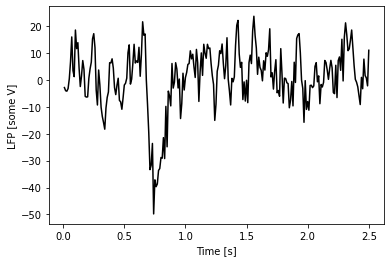

In [6]:
# plot the first of the trial
aca_1_trial = aca.xs(1,level='trial', axis=0)
plt.plot(aca_1_trial.index.get_level_values('time'), aca_1_trial['lfp'], color='k')
plt.xlabel('Time [s]')
plt.ylabel('LFP [some V]')

Trial number=338


Text(0, 0.5, 'LFP [some V]')

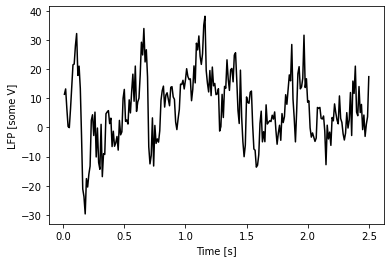

In [7]:
# plot a random trial
random_trial_num = np.random.randint(low=2, high=364)
print(f'Trial number={random_trial_num}')
aca_rand_trial = aca.xs(random_trial_num,level='trial', axis=0)
plt.plot(aca_rand_trial.index.get_level_values('time'), aca_rand_trial['lfp'], color='k')
plt.xlabel('Time [s]')
plt.ylabel('LFP [some V]')

In [8]:
# CAUTION: LFP trends can vary with trials

Text(0, 0.5, 'LFP [some V]')

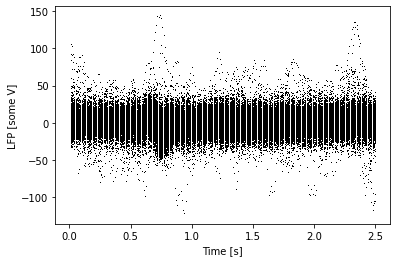

In [9]:
# plotting lfp data of all trials in ACA
trials = aca.index.get_level_values('trial').unique()
for trial in trials:
    trial_data = aca.loc[trial]
    time = trial_data.index.get_level_values('time')
    lfp = trial_data['lfp']
    plt.plot(time, lfp, color='k', marker=',', linestyle='None')
plt.xlabel('Time [s]')
plt.ylabel('LFP [some V]')

In [10]:
# Let's use datashader to see underlying patterns or lack of patterns
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
from datashader.colors import viridis
import pandas as pd

all_trial_data = pd.DataFrame(columns=['time', 'lfp'])

trials = aca.index.get_level_values('trial').unique()

for trial in trials:
    trial_data = aca.loc[trial]
    all_trial_data = all_trial_data.append(trial_data.reset_index(), ignore_index=True)


<ipython-input-10-aa98b55c9f20>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_trial_data = all_trial_data.append(trial_data.reset_index(), ignore_index=True)
<ipython-input-10-aa98b55c9f20>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_trial_data = all_trial_data.append(trial_data.reset_index(), ignore_index=True)
<ipython-input-10-aa98b55c9f20>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_trial_data = all_trial_data.append(trial_data.reset_index(), ignore_index=True)
<ipython-input-10-aa98b55c9f20>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_trial_data = all_trial_data.append(trial_data.reset_index(),

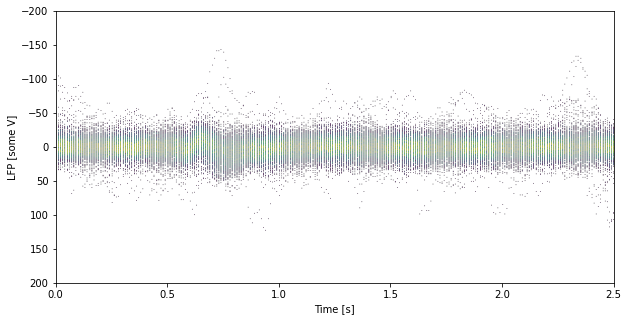

In [11]:

x_range=(0,2.5)
y_range = (-200., 200.)
cvs = ds.Canvas(plot_width=800, plot_height=400, x_range=x_range, y_range=y_range)
agg = cvs.points(all_trial_data, 'time', 'lfp')


img = tf.shade(agg, cmap=viridis, how='eq_hist')

plt.figure(figsize=(10, 5))
plt.imshow(img.to_pil(), extent=[0.,2.5,200.,-200.], aspect="auto")
plt.xlabel('Time [s]')
plt.ylabel('LFP [some V]');

Text(0.5, 0, 'Time [s]')

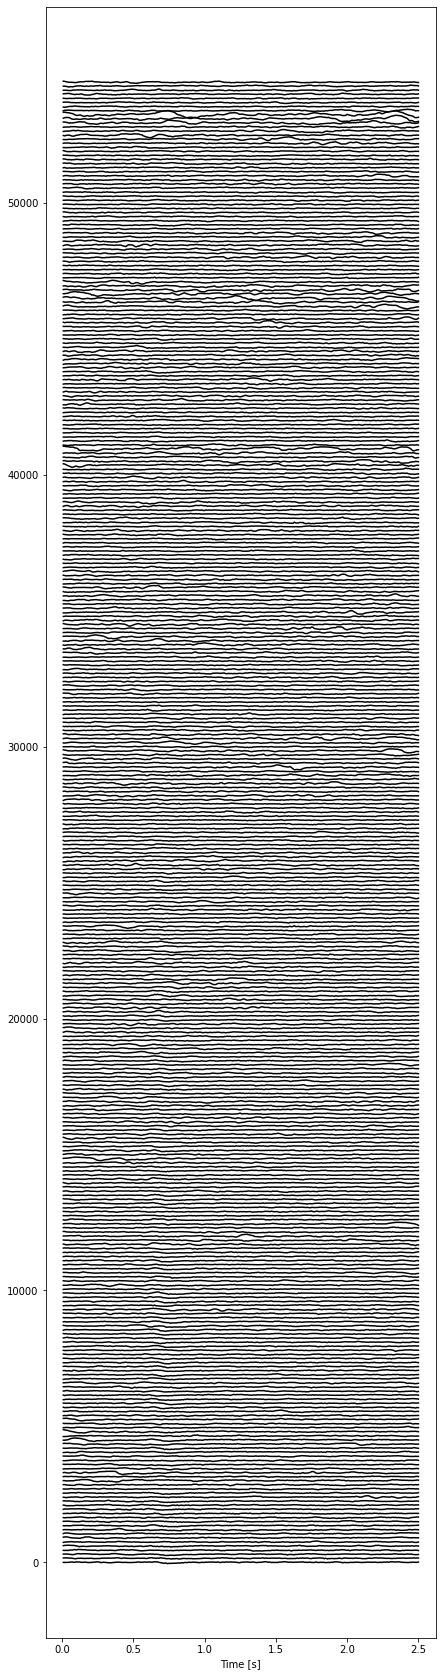

In [12]:
# plot with an offset

offset = 150.
trials = aca.index.get_level_values('trial').unique()
plt.figure(figsize=(7,30))
for offset_mul, trial in enumerate(trials):
    trial_data = aca.loc[trial]
    time = trial_data.index.get_level_values('time')
    lfp = trial_data['lfp'] + offset_mul*offset
    plt.plot(time, lfp, color='k')
plt.xlabel('Time [s]')

Text(0, 0.5, 'LFP [some V]')

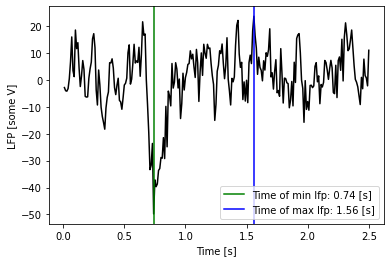

In [13]:
# what is the time of min and max lfp for the first trial?
aca_1_trial = aca.xs(1,level='trial', axis=0).reset_index()
min_time = aca_1_trial[aca_1_trial.lfp == aca_1_trial.lfp.min()]['time'].values[0]
max_time = aca_1_trial[aca_1_trial.lfp == aca_1_trial.lfp.max()]['time'].values[0]

plt.plot(aca_1_trial['time'], aca_1_trial['lfp'], color='k')
plt.axvline(min_time, label=f'Time of min lfp: {min_time} [s]', color='g')
plt.axvline(max_time, label=f'Time of max lfp: {max_time} [s]', color='b')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('LFP [some V]')



Trial number=106


Text(0, 0.5, 'LFP [some V]')

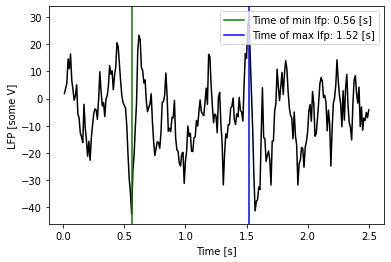

In [14]:
# do the same for random trial num
random_trial_num = np.random.randint(low=2, high=364)
print(f'Trial number={random_trial_num}')

aca_rand_trial = aca.xs(random_trial_num,level='trial', axis=0).reset_index()

min_time = aca_rand_trial[aca_rand_trial.lfp == aca_rand_trial.lfp.min()]['time'].values[0]
max_time = aca_rand_trial[aca_rand_trial.lfp == aca_rand_trial.lfp.max()]['time'].values[0]

plt.plot(aca_rand_trial['time'], aca_rand_trial['lfp'], color='k')
plt.axvline(min_time, label=f'Time of min lfp: {min_time} [s]', color='g')
plt.axvline(max_time, label=f'Time of max lfp: {max_time} [s]', color='b')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('LFP [some V]')

In [15]:
# CAUTION: time of min and max lfp can also vary

Text(0.5, 0, 'Time [s]')

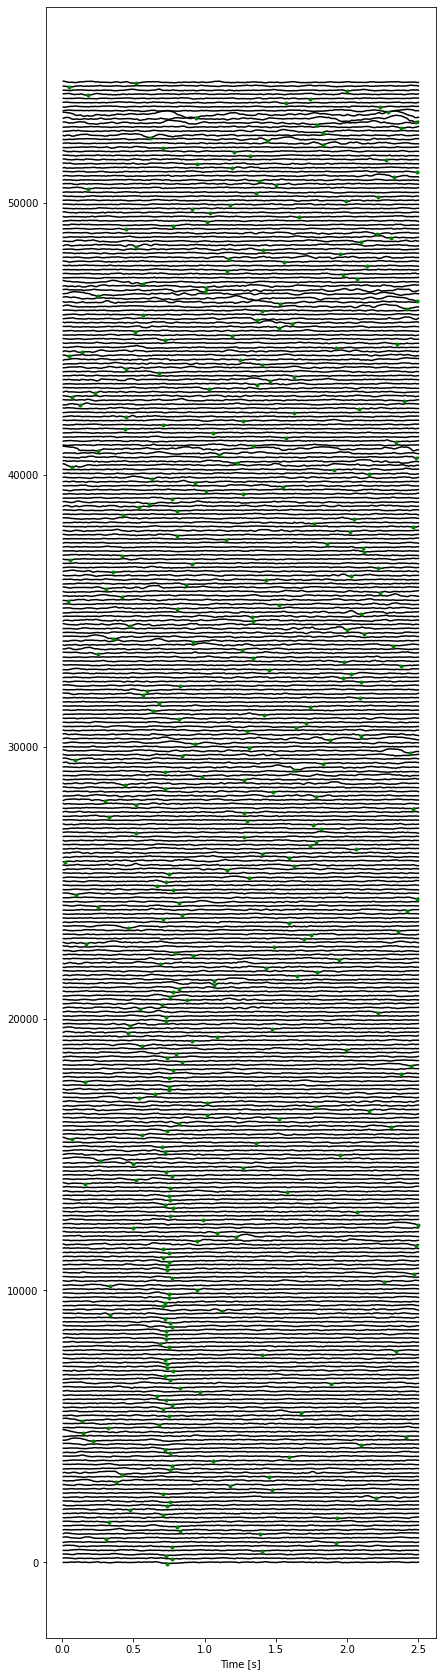

In [16]:
# let's plot times of min lfp of all trials with some offset 

offset = 150.
trials = aca.index.get_level_values('trial').unique()
plt.figure(figsize=(7,30))
for offset_mul, trial in enumerate(trials):
    trial_data = aca.loc[trial].reset_index()

    min_time = trial_data[trial_data.lfp == trial_data.lfp.min()]['time'].values[0]

    time = trial_data['time']
    lfp = trial_data['lfp'] + offset_mul*offset

    plt.plot(time, lfp, color='k')
    plt.plot([min_time], [trial_data.lfp.min()+offset_mul*offset], marker='.', color='g')
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

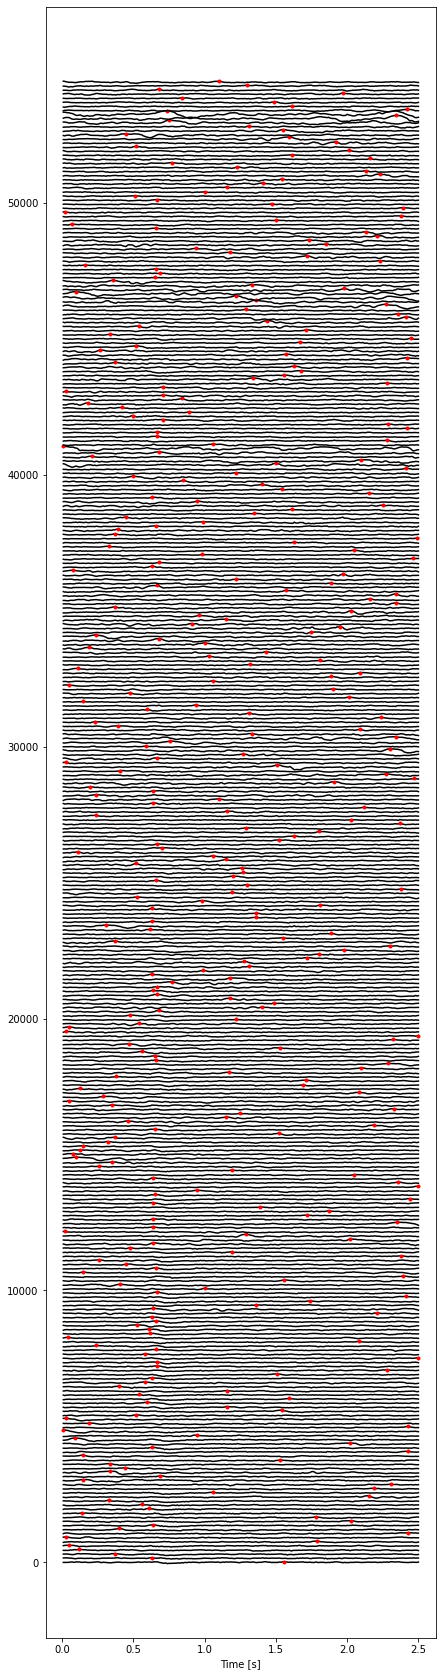

In [17]:
# let's plot times of max lfp of all trials with some offset 

offset = 150.
trials = aca.index.get_level_values('trial').unique()
plt.figure(figsize=(7,30))
for offset_mul, trial in enumerate(trials):
    trial_data = aca.loc[trial].reset_index()

    max_time = trial_data[trial_data.lfp == trial_data.lfp.max()]['time'].values[0]

    time = trial_data['time']
    lfp = trial_data['lfp'] + offset_mul*offset

    plt.plot(time, lfp, color='k')
    plt.plot([max_time], [trial_data.lfp.max()+offset_mul*offset], marker='.', color='r')
plt.xlabel('Time [s]')

In [18]:
# let's try the datashader for all brain areas in the dataset
lfp = lfp_dset.to_dataframe()
brain_areas = lfp.index.get_level_values('brain_area_lfp').unique()

In [19]:
import warnings

warnings.filterwarnings("ignore")


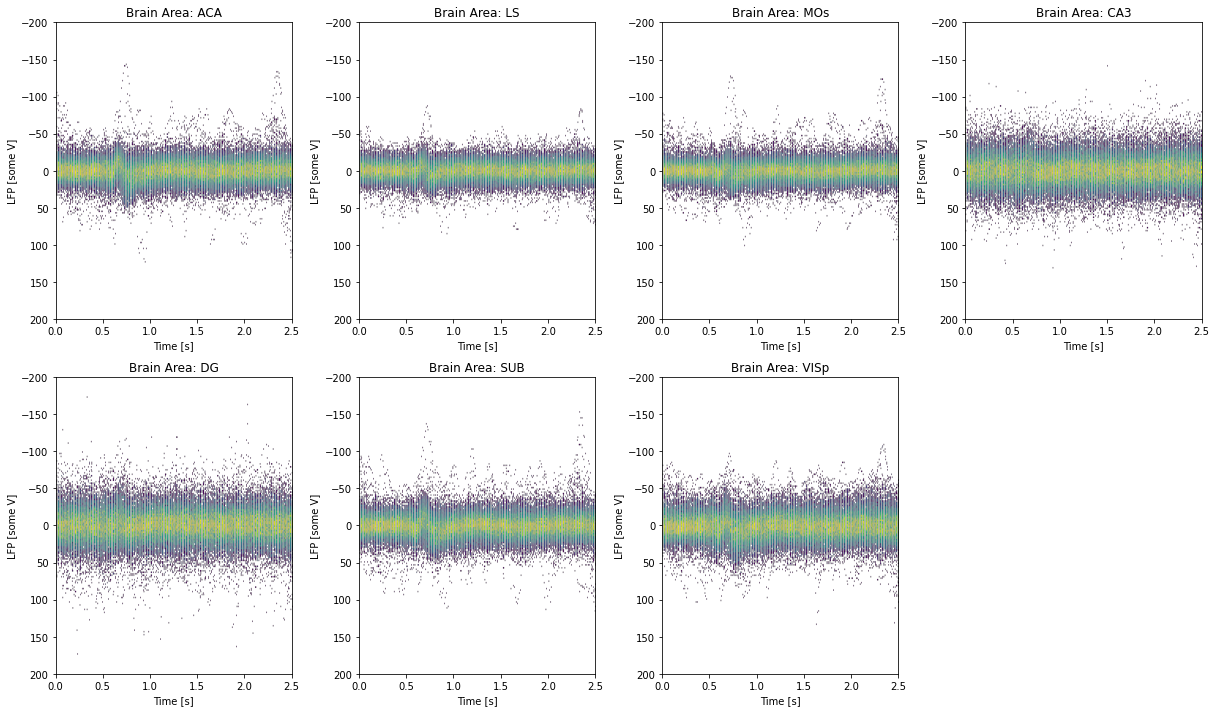

In [20]:
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
from datashader.colors import viridis
import pandas as pd


def create_merged_df(brain_area_df):
    all_trial_data = pd.DataFrame(columns=['time', 'lfp'])

    trials = brain_area_df.index.get_level_values('trial').unique()

    for trial in trials:
        trial_data = brain_area_df.loc[trial]
        all_trial_data = all_trial_data.append(trial_data.reset_index(), ignore_index=True)

    return all_trial_data



num_areas = len(brain_areas)
num_cols = 4 

num_rows = int(np.ceil(num_areas / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(17, 5 * num_rows))

for i, brain_area in enumerate(brain_areas):
    area_data = create_merged_df(lfp.xs(brain_area, level='brain_area_lfp', axis=0))

    row = i // num_cols
    col = i % num_cols

    cvs = ds.Canvas(plot_width=400, plot_height=200, x_range=x_range, y_range=y_range)

    agg = cvs.points(area_data, 'time', 'lfp')

    img = tf.shade(agg, cmap=viridis, how='eq_hist')

    ax = axes[row, col]
    ax.imshow(img.to_pil(), extent=[0., 2.5, 200., -200.], aspect="auto")
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('LFP [some V]')
    ax.set_title(f'Brain Area: {brain_area}')

for i in range(num_areas, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### Extra stuff

Text(0, 0.5, 'Power')

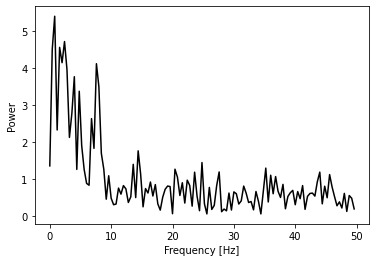

In [21]:
# compute a fft of lfp of first trial

aca_1_trial = aca.xs(1, level='trial', axis=0).reset_index()
times = aca_1_trial.time.values
lfps = aca_1_trial.lfp.values

N = len(times)
T = times[1] - times[0]

yf = fft(lfps)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), color='k')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

In [22]:
## Find all peaks

fmin = np.nanmin(xf)
fmax = np.nanmax(xf)
peak_flags = np.zeros_like(xf)
ls_derivative = np.zeros_like(xf)
nls = len(xf)
for k in range(1,int(nls),1):
    if (xf[k] < fmax):
        ls_derivative[k] = yf[k] - yf[k-1]
frequency_peaks_0 = np.zeros_like(xf)
for k in range(1,int(nls),1)        :
    if (ls_derivative[k-1] > 0 and ls_derivative[k] < 0):
        frequency_peaks_0[k-1] = 1
        peak_flags[k] = 1 # candidate peaks
min_snr = 3.0 # minimum signal-to-noise ratio to be identified as peak
meanrms = np.nanstd(yf,ddof=1)
for k in range(1,int(nls),1):
    if (frequency_peaks_0[k] == 1):
        if (yf[k] > min_snr*meanrms):
            peak_flags[k] = 2 # real peak

xf[peak_flags == 2]

array([0.8])

Text(0, 0.5, 'Power')

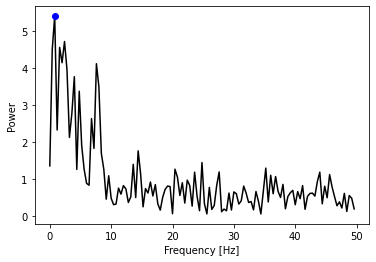

In [23]:
power = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, power, color='k')
plt.plot(xf[peak_flags == 2], power[peak_flags == 2], marker='o', color='b', linestyle='None')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

In [24]:
print(f'Frequency of maximum amplitude: {xf[peak_flags == 2][0]} Hz')

Frequency of maximum amplitude: 0.8 Hz


(0.0, 20.0)

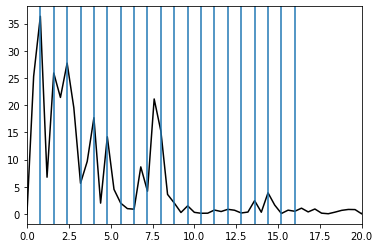

In [25]:
# same with periodogram
aca_1_trial = aca.xs(1, level='trial', axis=0).reset_index()
times = aca_1_trial.time.values
lfps = aca_1_trial.lfp.values


f, Pxx_den = periodogram(lfps, 100.)

plt.plot(f, Pxx_den, color='k')

harmonics = [0.8*i for i in range(1,21)]
for harmonic in harmonics:
    plt.axvline(harmonic)
    
plt.xlim(0,20)

Text(0.5, 1.0, 'LFP Heatmap')

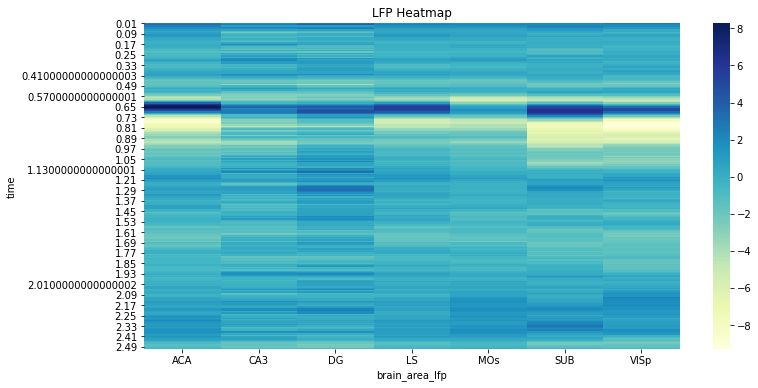

In [26]:
import matplotlib.ticker as ticker

lfp_reset = lfp.reset_index()

heatmap_data = lfp_reset.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc='mean')

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data.T, cmap="YlGnBu")

# plt.xlabel('Time [s]')
# plt.ylabel('Brain Area')
plt.title('LFP Heatmap')

Text(0.5, 1.0, 'LFP Heatmap')

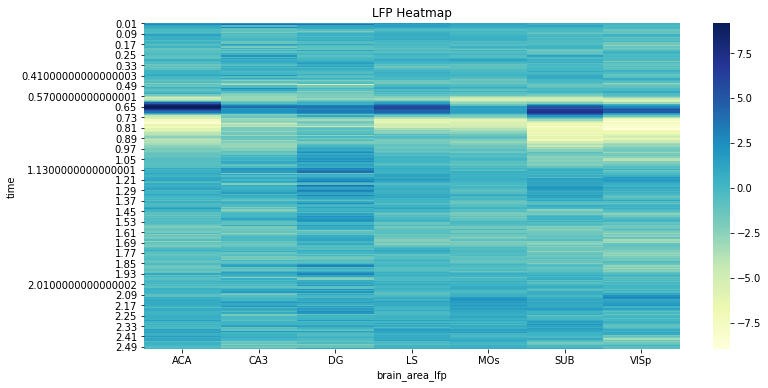

In [27]:
import matplotlib.ticker as ticker

lfp_reset = lfp.reset_index()

heatmap_data = lfp_reset.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc='median')

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data.T, cmap="YlGnBu")

# plt.xlabel('Time [s]')
# plt.ylabel('Brain Area')
plt.title('LFP Heatmap')

Text(0.5, 1.0, 'LFP Heatmap')

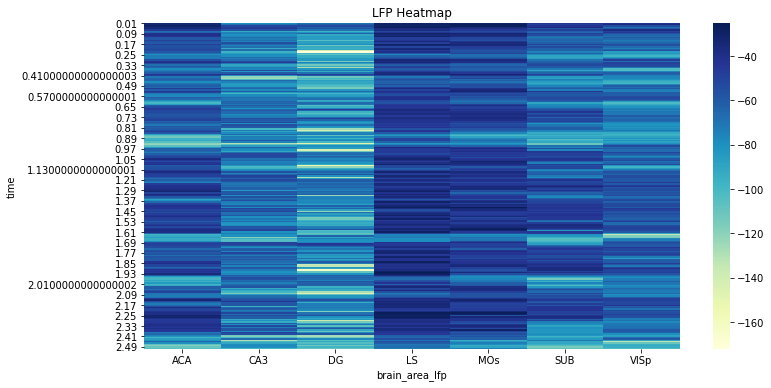

In [28]:
import matplotlib.ticker as ticker

lfp_reset = lfp.reset_index()

heatmap_data = lfp_reset.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc='min')

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data.T, cmap="YlGnBu")

# plt.xlabel('Time [s]')
# plt.ylabel('Brain Area')
plt.title('LFP Heatmap')

Text(0.5, 1.0, 'LFP Heatmap')

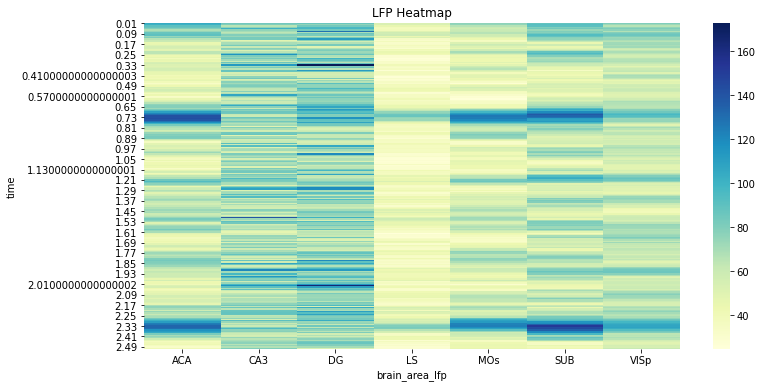

In [29]:
import matplotlib.ticker as ticker

lfp_reset = lfp.reset_index()

heatmap_data = lfp_reset.pivot_table(index='brain_area_lfp', columns='time', values='lfp', aggfunc='max')

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data.T, cmap="YlGnBu")

# plt.xlabel('Time [s]')
# plt.ylabel('Brain Area')
plt.title('LFP Heatmap')

In [30]:
lfp_trial_mean = lfp.groupby(by=['brain_area_lfp','time']).median()
lfp_trial_mean

lfp
brain_area_lfp time          
ACA            0.01  1.616893
               0.02  2.635828
               0.03  1.031859
               0.04  0.590816
               0.05  0.407823
...                       ...
VISp           2.46 -1.500278
               2.47 -1.132189
               2.48  0.069944
               2.49 -0.779685
               2.50 -0.706679

[1750 rows x 1 columns]

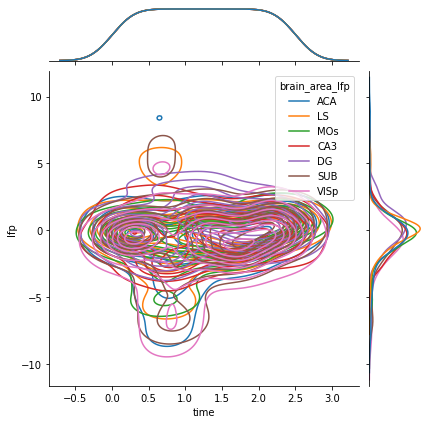

In [31]:
g = sns.jointplot(
    data=lfp_trial_mean,
    x="time", y="lfp", hue="brain_area_lfp",
    kind="kde",
)


(0.0, 50.0)

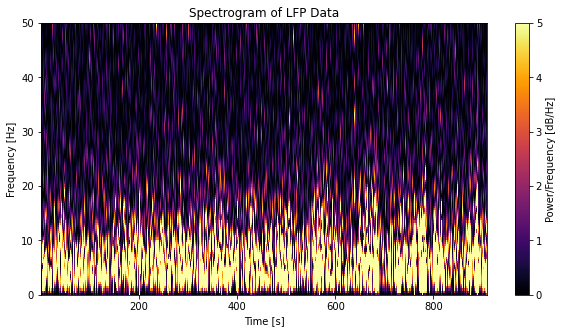

In [32]:
from scipy.signal import spectrogram

time = aca.index.get_level_values('time')
lfp_data = aca['lfp']

# Parameters for the spectrogram
fs = 1.0 / (time[1] - time[0])  # Sampling frequency
nperseg = 32  # Number of data points in each segment
noverlap = 16  # Number of overlap points between segments
nfft = 256  # Number of data points used in each block for the FFT
cmap = 'inferno'  # Colormap for the spectrogram

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(lfp_data, fs=fs, nperseg=nperseg, noverlap=noverlap, nfft=nfft)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
# plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), cmap=cmap)
plt.pcolormesh(times, frequencies, Sxx, cmap=cmap, vmin=0, vmax=5)
plt.title('Spectrogram of LFP Data')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency [dB/Hz]')
plt.ylim(0, 50)  # Adjust the frequency range if needed

In [33]:
aca.xs(1, level='trial', axis=0).reset_index()

time        lfp
0    0.01  -2.850794
1    0.02  -4.039683
2    0.03  -4.195238
3    0.04  -3.228571
4    0.05   0.460317
..    ...        ...
245  2.46   7.715873
246  2.47   1.593651
247  2.48   0.726984
248  2.49  -2.217460
249  2.50  10.993651

[250 rows x 2 columns]

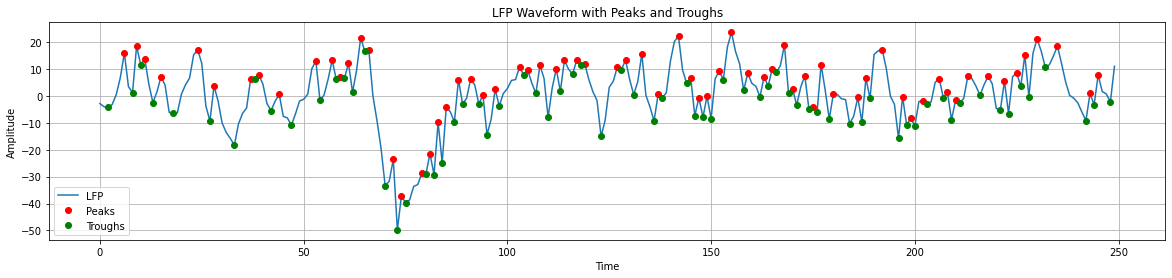

In [34]:
from scipy.signal import find_peaks, find_peaks_cwt

# Example LFP waveform data (replace with your actual data)
lfp_data = aca.xs(1, level='trial', axis=0)['lfp'].values

# Find peaks in the LFP waveform
peaks, _ = find_peaks(lfp_data)  # Adjust the 'height' parameter as needed

# Find troughs in the LFP waveform
troughs, _ = find_peaks(-lfp_data)  # Adjust the 'height' parameter as needed

# Plot the LFP waveform with detected peaks and troughs
plt.figure(figsize=(20, 4))
plt.plot(lfp_data, label="LFP")
plt.plot(peaks, lfp_data[peaks], "ro", label="Peaks")
plt.plot(troughs, lfp_data[troughs], "go", label="Troughs")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.title("LFP Waveform with Peaks and Troughs")
plt.grid(True)

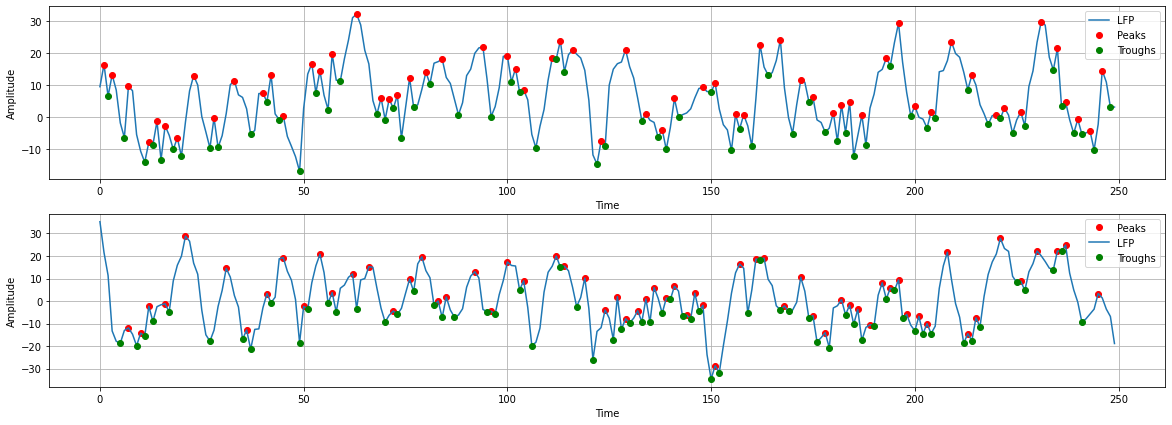

In [35]:
from scipy.signal import find_peaks, find_peaks_cwt

trial_num = np.random.randint(1,364)

# Example LFP waveform data (replace with your actual data)
aca = lfp.xs('ACA', level='brain_area_lfp', axis=0)
visp = lfp.xs('VISp', level='brain_area_lfp', axis=0)

aca_lfp_data = aca.xs(trial_num, level='trial', axis=0)['lfp'].values
visp_lfp_data = visp.xs(trial_num, level='trial', axis=0)['lfp'].values

aca_peaks, _ = find_peaks(aca_lfp_data)  # Adjust the 'height' parameter as needed
aca_troughs, _ = find_peaks(-aca_lfp_data)  # Adjust the 'height' parameter as needed

visp_peaks, _ = find_peaks(visp_lfp_data)  # Adjust the 'height' parameter as needed
visp_troughs, _ = find_peaks(-visp_lfp_data)  # Adjust the 'height' parameter as needed

fig, ax = plt.subplots(nrows=2, figsize=(20,7))
ax[0].plot(aca_lfp_data, label="LFP")
ax[0].plot(aca_peaks, aca_lfp_data[aca_peaks], "ro", label="Peaks")
ax[0].plot(aca_troughs, aca_lfp_data[aca_troughs], "go", label="Troughs")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(visp_peaks, visp_lfp_data[visp_peaks], "ro", label="Peaks")
ax[1].plot(visp_lfp_data, label="LFP")
ax[1].plot(visp_troughs, visp_lfp_data[visp_troughs], "go", label="Troughs")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Amplitude")
ax[1].legend()
ax[1].grid(True)

In [36]:
brain_areas

Index(['ACA', 'LS', 'MOs', 'CA3', 'DG', 'SUB', 'VISp'], dtype='object', name='brain_area_lfp')

Phase-Locking Value (PLV) between ACA and MOs in trial 84: 0.8869


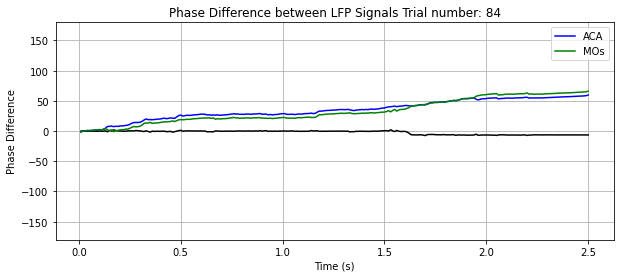

In [37]:
from scipy.signal import hilbert
aca = lfp

theta_band = (0, 50)  

# Select LFP data from two brain areas for synchronization analysis
brain_area1 = 'ACA'  # Replace with your target brain areas
brain_area2 = 'MOs'

# Select trials for synchronization analysis
trial1 = trial2 = np.random.randint(1,364)  

# Filter the DataFrame to select relevant data
lfp_area1 = aca.loc[(aca.index.get_level_values('brain_area_lfp') == brain_area1) & (aca.index.get_level_values('trial') == trial1)]
lfp_area2 = aca.loc[(aca.index.get_level_values('brain_area_lfp') == brain_area2) & (aca.index.get_level_values('trial') == trial2)]

# Compute the Hilbert transform to extract the analytic signal
analytic_signal1 = hilbert(lfp_area1['lfp'])
analytic_signal2 = hilbert(lfp_area2['lfp'])

# Calculate the phase of the analytic signal
phase1 = np.angle(analytic_signal1)
phase2 = np.angle(analytic_signal2)

# Compute the Phase-Locking Value (PLV) for the selected frequency band
plv = np.abs(np.mean(np.exp(1j * (phase1 - phase2))))

# Print the PLV
print(f"Phase-Locking Value (PLV) between {brain_area1} and {brain_area2} in trial {trial1}: {plv:.4f}")

# Plot the phase difference between the two signals
plt.figure(figsize=(10, 4))
plt.plot(lfp_area1.index.get_level_values('time'), np.unwrap(phase1 - phase2), color='k')
plt.plot(lfp_area1.index.get_level_values('time'), np.unwrap(phase1), color='b', label=brain_area1)
plt.plot(lfp_area2.index.get_level_values('time'), np.unwrap(phase2), color='g', label=brain_area2)
plt.xlabel('Time (s)')
plt.ylabel('Phase Difference')
plt.title(f'Phase Difference between LFP Signals Trial number: {trial1}')
plt.ylim(-180.,180.)
plt.legend()
plt.grid(True)

In [39]:
np.angle(analytic_signal1)

array([-1.5567917 ,  0.36948017,  0.20900802,  0.83782299,  0.69891787,
        0.9023209 ,  1.21081564,  1.57965656,  1.83968031,  2.37369813,
        2.07937281,  2.66452181, -1.72330208,  1.29116287,  1.51713283,
        2.13808127,  1.0854061 ,  1.60781312,  1.50208397,  1.93669574,
        2.44959474,  2.40491588, -3.11090986, -2.72759516, -1.35750857,
        0.44494346,  1.61662755,  1.67242846,  1.63945745,  2.0263745 ,
       -2.73972935, -0.48082105,  1.22276612,  0.13163491,  0.06606936,
        0.0121737 ,  0.28599067,  0.47033733,  0.86903539,  1.25930084,
        2.00218612,  2.53401891,  1.61013611,  2.18016942,  2.88665988,
        2.49373784,  2.23154456, -1.6873167 ,  0.42110002,  1.41079994,
       -0.27010454,  0.30956332,  1.05019764,  0.82092615,  0.94609531,
        1.58274765,  1.79640301,  2.00509249,  2.43230454,  2.94579816,
        2.80902092,  2.62148589,  1.50796803,  1.96902453,  1.06578113,
        1.65247155,  1.05403973,  1.76176035,  0.98178212,  1.21